## Monte Carlo Simulation

Estimated value of π: 3.141673268


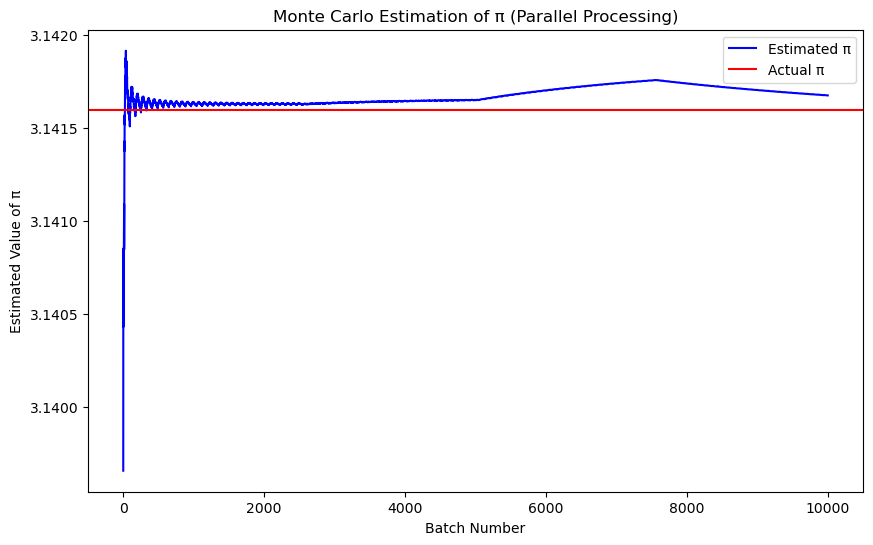

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from multiprocessing import Pool, cpu_count

# Function to perform Monte Carlo estimation for a batch
def monte_carlo_batch(batch_size):
    x = np.random.rand(batch_size)
    y = np.random.rand(batch_size)
    inside_circle = np.sum(x**2 + y**2 <= 1)
    return inside_circle

# Main function for parallel processing
def parallel_monte_carlo(num_points, batch_size):
    # Calculate the total number of batches
    total_batches = num_points // batch_size
    
    # Use all available CPU cores
    pool = Pool(cpu_count())
    
    # Distribute the computation across all cores
    results = pool.map(monte_carlo_batch, [batch_size] * total_batches)
    
    # Close the pool and wait for all processes to complete
    pool.close()
    pool.join()
    
    # Aggregate results from all batches
    total_inside_circle = sum(results)
    pi_estimate = (total_inside_circle / num_points) * 4
    
    return pi_estimate, results

# Parameters
num_points = 10**10  # Adjust to your desired total points
batch_size = 10**6  # Batch size per core for processing

# Run the parallel Monte Carlo simulation
pi_estimate, results = parallel_monte_carlo(num_points, batch_size)

# Print the final estimated value of π
print(f"Estimated value of π: {pi_estimate}")

# Plot the convergence of the estimate (optional)
batch_estimates = [(sum(results[:i+1]) / ((i+1) * batch_size)) * 4 for i in range(len(results))]

plt.figure(figsize=(10, 6))
plt.plot(batch_estimates, label="Estimated π", color="blue")
plt.axhline(y=np.pi, color='red', linestyle='-', label="Actual π")
plt.xlabel('Batch Number')
plt.ylabel('Estimated Value of π')
plt.legend()
plt.title('Monte Carlo Estimation of π (Parallel Processing)')
plt.show()


## Using GPU for the same calculation.

In [3]:
import cupy as cp
import matplotlib.pyplot as plt

# Monte Carlo estimation function using CuPy with batch processing
def monte_carlo_pi_gpu_batch(total_points, batch_size):
    inside_circle = 0
    num_batches = total_points // batch_size
    
    for _ in range(num_batches):
        # Generate random points for the current batch on the GPU
        x = cp.random.rand(batch_size)
        y = cp.random.rand(batch_size)
        
        # Count points inside the quarter circle for this batch
        inside_circle += cp.sum(x**2 + y**2 <= 1)
    
    # Estimate π
    pi_estimate = (inside_circle / total_points) * 4
    return pi_estimate

# Parameters
total_points = 10**10  # Total points to simulate
batch_size = 10**6    # Batch size to fit within GPU memory limits

# Run the Monte Carlo simulation on the GPU with batching
pi_estimate = monte_carlo_pi_gpu_batch(total_points, batch_size)

# Print the estimated value of π
print(f"Estimated value of π: {pi_estimate.get()}")

# Optional: Collect batch estimates for plotting convergence
pi_estimates = []
inside_circle = 0

# Batch processing with convergence tracking
for i in range(total_points // batch_size):
    # Generate random points for the current batch on the GPU
    x = cp.random.rand(batch_size)
    y = cp.random.rand(batch_size)
    
    # Count points inside the quarter circle for this batch
    inside_circle += cp.sum(x**2 + y**2 <= 1)
    
    # Estimate π based on points seen so far and store for plotting
    pi_estimate = (inside_circle / ((i + 1) * batch_size)) * 4
    pi_estimates.append(pi_estimate.get())

# Plot the convergence of the estimate over batches
plt.figure(figsize=(10, 6))
plt.plot(pi_estimates, label="Estimated π", color="blue")
plt.axhline(y=cp.pi, color='red', linestyle='-', label="Actual π")  # No need for .get()
plt.xlabel('Batch Number')
plt.ylabel('Estimated Value of π')
plt.legend()
plt.title('Monte Carlo Estimation of π (GPU Batch Processing)')
plt.show()


ModuleNotFoundError: No module named 'cupy'